In [114]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import matplotlib
import numpy as np

In [115]:
dataset = load_digits()

In [116]:
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [117]:
len(dataset.target)

1797

In [118]:
len(dataset.data[0])

64

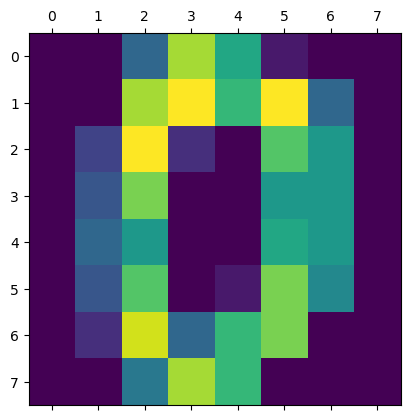

In [119]:
plt.matshow(dataset.images[0])
plt.show()

In [120]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [121]:
X = dataset.data/16

In [122]:
y = dataset.target

In [123]:
X[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [124]:
y[0]

0

In [125]:
len(X)

1797

In [126]:
split = 50
learning_rate = 0.01
no_of_iterations = 100

In [127]:
x_train = X[:split]
x_test = X[split:]
y_train = y[:split]
y_test = y[split:]
y_train_list = []
y_test_list = []

In [128]:
len(x_train)

50

In [129]:
len(y_train)

50

In [130]:
y[0]

0

In [131]:
for i in y_train:
    tmp_list = []
    for j in range(10):

        if i == j:
            tmp_list.append(1)
        else:
            tmp_list.append(0)
    y_train_list.append(tmp_list)

In [132]:
for i in y_test:
    tmp_list = []
    for j in range(10):

        if i == j:
            tmp_list.append(1)
        else:
            tmp_list.append(0)
    y_test_list.append(tmp_list)

In [133]:
y_train = np.array(y_train_list)
y_test = np.array(y_test_list)

In [134]:
weights = np.zeros(640).reshape(10,64)
bias = np.zeros(10).reshape(10,1)

In [138]:
for n in range(no_of_iterations):
    weights_sum = np.zeros(640).reshape(10,64)
    bias_sum = np.zeros(10).reshape(10,1)
    score = 0
    for i in range(len(x_train)):
        row = x_train[i]
        x = np.array(row).reshape(64,1)
        predicted = np.dot(weights, x) + bias
        predicted_number = np.argmax(predicted)
        actual = np.array(y_train[i]).reshape(10,1)
        actual_number = np.argmax(actual)
        
        if predicted_number == 0:
            err = actual - np.array([1,0,0,0,0,0,0,0,0,0]).reshape(10,1)
        elif predicted_number == 1:
            err = actual - np.array([0,1,0,0,0,0,0,0,0,0]).reshape(10,1)
        elif predicted_number == 2:
            err = actual - np.array([0,0,1,0,0,0,0,0,0,0]).reshape(10,1)
        elif predicted_number == 3:
            err = actual - np.array([0,0,0,1,0,0,0,0,0,0]).reshape(10,1)
        elif predicted_number == 4:
            err = actual - np.array([0,0,0,0,1,0,0,0,0,0]).reshape(10,1)
        elif predicted_number == 5:
            err = actual - np.array([0,0,0,0,0,1,0,0,0,0]).reshape(10,1)
        elif predicted_number == 6:
            err = actual - np.array([0,0,0,0,0,0,1,0,0,0]).reshape(10,1)
        elif predicted_number == 7:
            err = actual - np.array([0,0,0,0,0,0,0,1,0,0]).reshape(10,1)
        elif predicted_number == 8:
            err = actual - np.array([0,0,0,0,0,0,0,0,1,0]).reshape(10,1)
        elif predicted_number == 9:
            err = actual - np.array([0,0,0,0,0,0,0,0,0,1]).reshape(10,1)
            
        if predicted_number == actual_number:
            score += 1
            
        accuracy = (score / (i+1))* 100
        print(f"Training.... Iteration: {n} Accuracy: {accuracy}")
        
        for j in range(10):
            for k in range(64):
                weights_sum[j][k] += err[j]*x[k]
            bias_sum[j][0] += err[j]
    md = (-2/len(x_train))*weights_sum
    bd = (-2/len(x_train))*bias_sum
    weights = weights - learning_rate * md
    bias = bias - learning_rate * bd

Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy: 100.0
Training.... Iteration: 0 Accuracy

Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy: 100.0
Training.... Iteration: 4 Accuracy

Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy: 100.0
Training.... Iteration: 8 Accuracy

Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 12 Accuracy: 100.0
Training.... Iteration: 13 Accuracy: 100.0
Training.... Iteration: 13 Accuracy: 100.0
Training.... Iteration: 13 Accuracy: 100.0
Training.... Iteration: 13 Accuracy: 100.0
Training...

Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training.... Iteration: 17 Accuracy: 100.0
Training...

Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training.... Iteration: 21 Accuracy: 100.0
Training...

Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 25 Accuracy: 100.0
Training.... Iteration: 26 Accuracy: 100.0
Training.... Iteration: 26 Accuracy: 100.0
Training.... Iteration: 26 Accuracy: 100.0
Training...

Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training.... Iteration: 30 Accuracy: 100.0
Training...

Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 34 Accuracy: 100.0
Training.... Iteration: 35 Accuracy: 100.0
Training.... Iteration: 35 Accuracy: 100.0
Training.... Iteration: 35 Accuracy: 100.0
Training.... Iteration: 35 Accuracy: 100.0
Training...

Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training.... Iteration: 39 Accuracy: 100.0
Training...

Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training.... Iteration: 43 Accuracy: 100.0
Training...

Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training.... Iteration: 47 Accuracy: 100.0
Training...

Training.... Iteration: 51 Accuracy: 100.0
Training.... Iteration: 51 Accuracy: 100.0
Training.... Iteration: 51 Accuracy: 100.0
Training.... Iteration: 51 Accuracy: 100.0
Training.... Iteration: 51 Accuracy: 100.0
Training.... Iteration: 51 Accuracy: 100.0
Training.... Iteration: 51 Accuracy: 100.0
Training.... Iteration: 51 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training.... Iteration: 52 Accuracy: 100.0
Training...

Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training.... Iteration: 56 Accuracy: 100.0
Training...

Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training.... Iteration: 60 Accuracy: 100.0
Training...

Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 64 Accuracy: 100.0
Training.... Iteration: 65 Accuracy: 100.0
Training.... Iteration: 65 Accuracy: 100.0
Training...

Training.... Iteration: 68 Accuracy: 100.0
Training.... Iteration: 68 Accuracy: 100.0
Training.... Iteration: 68 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training.... Iteration: 69 Accuracy: 100.0
Training...

Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training.... Iteration: 73 Accuracy: 100.0
Training...

Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 77 Accuracy: 100.0
Training.... Iteration: 78 Accuracy: 100.0
Training.... Iteration: 78 Accuracy: 100.0
Training.... Iteration: 78 Accuracy: 100.0
Training.... Iteration: 78 Accuracy: 100.0
Training...

Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 81 Accuracy: 100.0
Training.... Iteration: 82 Accuracy: 100.0
Training.... Iteration: 82 Accuracy: 100.0
Training.... Iteration: 82 Accuracy: 100.0
Training.... Iteration: 82 Accuracy: 100.0
Training.... Iteration: 82 Accuracy: 100.0
Training.... Iteration: 82 Accuracy: 100.0
Training.... Iteration: 82 Accuracy: 100.0
Training.... Iteration: 82 Accuracy: 100.0
Training...

Training.... Iteration: 85 Accuracy: 100.0
Training.... Iteration: 85 Accuracy: 100.0
Training.... Iteration: 85 Accuracy: 100.0
Training.... Iteration: 85 Accuracy: 100.0
Training.... Iteration: 85 Accuracy: 100.0
Training.... Iteration: 85 Accuracy: 100.0
Training.... Iteration: 85 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training.... Iteration: 86 Accuracy: 100.0
Training...

Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training.... Iteration: 90 Accuracy: 100.0
Training...

Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training.... Iteration: 94 Accuracy: 100.0
Training...

Training.... Iteration: 98 Accuracy: 100.0
Training.... Iteration: 98 Accuracy: 100.0
Training.... Iteration: 98 Accuracy: 100.0
Training.... Iteration: 98 Accuracy: 100.0
Training.... Iteration: 98 Accuracy: 100.0
Training.... Iteration: 98 Accuracy: 100.0
Training.... Iteration: 98 Accuracy: 100.0
Training.... Iteration: 98 Accuracy: 100.0
Training.... Iteration: 98 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training.... Iteration: 99 Accuracy: 100.0
Training...

In [139]:
bias

array([[-4.00000000e-04],
       [-4.00000000e-04],
       [ 4.00000000e-04],
       [ 4.00000000e-04],
       [ 1.20000000e-03],
       [-1.20000000e-03],
       [ 2.16840434e-19],
       [ 1.20000000e-03],
       [-1.20000000e-03],
       [-1.30104261e-18]])

In [140]:
weights

array([[ 0.00000000e+00, -5.25000000e-04, -2.12500000e-03,
         3.92500000e-03,  7.25000000e-04, -2.25000000e-03,
        -1.25000000e-03, -2.50000000e-05,  0.00000000e+00,
        -1.07500000e-03,  3.15000000e-03,  3.55000000e-03,
        -1.27500000e-03,  5.17500000e-03,  6.00000000e-04,
         0.00000000e+00,  0.00000000e+00,  2.55000000e-03,
         7.65000000e-03, -3.15000000e-03, -8.70000000e-03,
         3.67500000e-03,  4.15000000e-03,  0.00000000e+00,
         0.00000000e+00,  2.00000000e-03,  5.67500000e-03,
        -9.55000000e-03, -1.20000000e-02,  1.22500000e-03,
         4.72500000e-03,  0.00000000e+00,  0.00000000e+00,
         2.57500000e-03,  5.62500000e-03, -8.47500000e-03,
        -1.20750000e-02,  7.50000000e-05,  5.87500000e-03,
         0.00000000e+00,  0.00000000e+00,  1.75000000e-03,
         1.06750000e-02, -3.77500000e-03, -8.82500000e-03,
         1.80000000e-03,  2.37500000e-03,  0.00000000e+00,
         0.00000000e+00,  4.00000000e-04,  7.80000000e-0

In [142]:
score = 0
for i in range(len(x_test)):
    row = x_test[i]
    x = np.array(row).reshape(64,1)
    predicted = np.dot(weights, x) + bias
    predicted_number = np.argmax(predicted)
    actual = np.array(y_test[i]).reshape(10,1)
    actual_number = np.argmax(actual)
    
    if predicted_number == actual_number:
        score += 1
            
    accuracy = (score / (i+1))* 100
    print(f"Testing....Actual number: {actual_number} Predicted_number: {predicted_number} Accuracy: {accuracy}")

Testing....Actual number: 2 Predicted_number: 2 Accuracy: 100.0
Testing....Actual number: 2 Predicted_number: 2 Accuracy: 100.0
Testing....Actual number: 7 Predicted_number: 7 Accuracy: 100.0
Testing....Actual number: 8 Predicted_number: 8 Accuracy: 100.0
Testing....Actual number: 2 Predicted_number: 7 Accuracy: 80.0
Testing....Actual number: 0 Predicted_number: 0 Accuracy: 83.33333333333334
Testing....Actual number: 1 Predicted_number: 1 Accuracy: 85.71428571428571
Testing....Actual number: 2 Predicted_number: 2 Accuracy: 87.5
Testing....Actual number: 6 Predicted_number: 6 Accuracy: 88.88888888888889
Testing....Actual number: 3 Predicted_number: 3 Accuracy: 90.0
Testing....Actual number: 3 Predicted_number: 3 Accuracy: 90.9090909090909
Testing....Actual number: 7 Predicted_number: 7 Accuracy: 91.66666666666666
Testing....Actual number: 3 Predicted_number: 3 Accuracy: 92.3076923076923
Testing....Actual number: 3 Predicted_number: 3 Accuracy: 92.85714285714286
Testing....Actual number: